데이터 로드 및 탐색

In [2]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('mobile.csv')

# 데이터 확인
print(df.head())
print(df.info())
print(df.describe())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

데이터 전처리

In [6]:
# 결측값 처리 (있다면)
df = df.dropna()

# 특성과 레이블 분리
X = df.drop('price_range', axis=1)  # 가격을 예측할 특성들
y = df['price_range']  # 가격 레이블

# 데이터 스케일링 (모델에 따라 필요할 수 있음)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


모델 훈련 및 평가

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. 로지스틱 회귀
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# 2. 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# 3. 랜덤 포레스트
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 4. 서포트 벡터 머신 (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# 각 모델의 분류 보고서
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.9775
Decision Tree Accuracy: 0.8375
Random Forest Accuracy: 0.8925
SVM Accuracy: 0.8925

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       105
           1       0.75      0.85      0.80        91
           2       0.80      0.71      0.75        92
           3       0.87      0.90      0.89       112

    accuracy                           0.84       400
   macro avg       0.83    

결과 비교

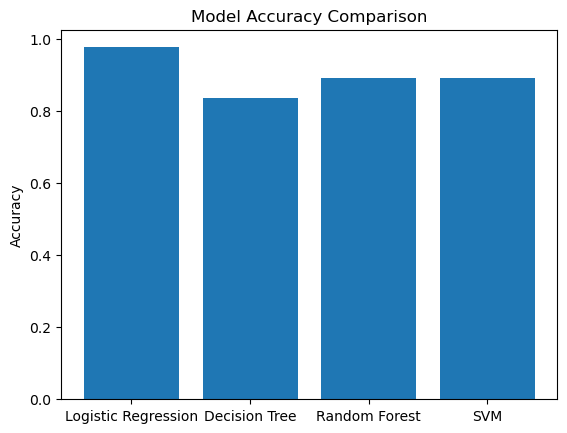

In [3]:
import matplotlib.pyplot as plt

# 정확도 리스트
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

# 모델 이름 리스트
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# 바 그래프 출력
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
